<a href="https://colab.research.google.com/github/Hoanguyenphuong31231025892/Bai_Tap_Ca_Nhan/blob/main/iris_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving Iris_versicolor.jpg to Iris_versicolor.jpg
Saving Iris_virginica.jpg to Iris_virginica.jpg
Saving Iris_setosa.jpg to Iris_setosa.jpg


1. Định nghĩa vấn đề (Define Problem)
Mô tả:
Bộ dữ liệu bao gồm 50 mẫu từ mỗi loài trong số ba loài Iris (Iris setosa, Iris virginica và Iris versicolor).
Bốn đặc điểm được đo từ mỗi mẫu: chiều dài và chiều rộng của các lá đài(sepal) và cánh hoa (petal), tính bằng cm.
Dữ liệu vào:
sepal length (cm)
sepal width (cm)
petal length (cm)
petal width (cm)
Kết quả: class (Iris Setosa, Iris Versicolour, Iris Virginica)


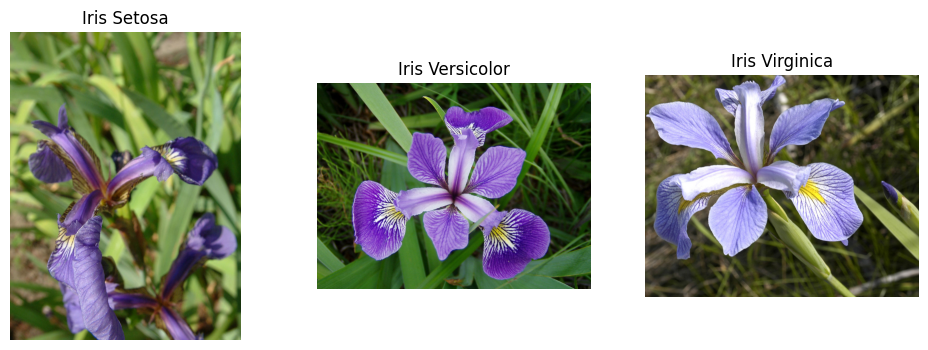

In [2]:
from PIL import Image
import matplotlib.pyplot as plt

# Mở ảnh
image1 = Image.open("Iris_setosa.jpg")
image2 = Image.open("Iris_versicolor.jpg")
image3 = Image.open("Iris_virginica.jpg")

# Hiển thị ảnh theo hàng ngang
plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
plt.imshow(image1)
plt.axis('off')
plt.title("Iris Setosa")

plt.subplot(1,3,2)
plt.imshow(image2)
plt.axis('off')
plt.title("Iris Versicolor")

plt.subplot(1,3,3)
plt.imshow(image3)
plt.axis('off')
plt.title("Iris Virginica")

plt.show()

**Khai báo vấn đề **

In [3]:
# 2.1. Khai báo thư viện (Load Libraries)
import os, sys
from IPython import display
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import joblib

from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split

import warnings

%matplotlib inline
warnings.filterwarnings("ignore")


In [4]:
# 2.2. Nạp dữ liệu (Load Dataset)
# =========================================

# Tạo thư mục data và tải file iris.csv nếu chưa có
!mkdir -p data
!wget -q -O data/iris.csv https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data

# Đặt tên các cột
data_path  = "data/iris.csv"
data_names = ["sepal-length", "sepal-width", "petal-length", "petal-width", "class"]

# Đọc dữ liệu vào DataFrame
df_dataset = pd.read_csv(data_path, names=data_names)

# Hiển thị 5 dòng đầu tiên
df_dataset.head()

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


**3. Phân tích dữ liệu (Analyze Data)**

3.1. Thống kê mô tả (Descriptive Statistics)
(1) Hiển thị một số thông tin về dữ liệu
Số dòng, số cột của dữ liệu
Kiểu dữ liệu của từng cột
5 dòng đầu và 5 dòng cuối của bảng dữ liệu
Thông tin chung về dữ liệu

**(1) Hiển thị một số thông tin về dữ liệu**

In [5]:
# Thông tin tổng quan dataset
print(f'+ Shape: {df_dataset.shape}')

# Kiểu dữ liệu từng cột
print(f'+ Data Types:\n{df_dataset.dtypes}')

# Hiển thị vài dòng đầu và cuối
print(f'+ Contents:')
from IPython.display import display  # đảm bảo Colab nhận đúng hàm display
display(df_dataset.head(5))
display(df_dataset.tail(5))

# Thông tin chi tiết dataset
print('\n+ Dataset Info:')
df_dataset.info()


+ Shape: (150, 5)
+ Data Types:
sepal-length    float64
sepal-width     float64
petal-length    float64
petal-width     float64
class            object
dtype: object
+ Contents:


,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


,sepal-length,sepal-width,petal-length,petal-width,class
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica



+ Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal-length  150 non-null    float64
 1   sepal-width   150 non-null    float64
 2   petal-length  150 non-null    float64
 3   petal-width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


Nhận xét:

Dữ liệu có 4 tính chất để phân lớp: sepal-length, sepal-width, petal-length, petal-width
Giá trị 4 tính chất được tính cùng đơn vị đo (cm)
Tổng số dòng dữ liệu là 150 dòng
Dữ liệu để phân lớp ở cột class
(2) Kiểm tra tính toàn vẹn của dữ liệu
Dữ liệu có bị trùng lặp không? Hiển thị dòng bị vi phạm.
Dữ liệu có tồn tại giá trị Null không? Hiển thị dòng bị vi phạm.
Dữ liệu có tồn tại giá trị NaN không? Hiển thị dòng bị vi phạm.





**(2) Kiểm tra tính toàn vẹn của dữ liệu**

In [6]:
# Kiểm tra tính toàn vẹn dữ liệu
from IPython.display import display

has_null = df_dataset.isnull().sum().any()
has_nan  = df_dataset.isna().sum().any()
n_duplicated = df_dataset.duplicated().sum()

print('Tính toàn vẹn dữ liệu:')
print(f'+ Có giá trị Null: {has_null}')
if has_null:
    print('→ Các dòng chứa giá trị Null:')
    display(df_dataset[df_dataset.isnull().any(axis=1)])

print(f'+ Có giá trị NaN: {has_nan}')
if has_nan:
    print('→ Các dòng chứa giá trị NaN:')
    display(df_dataset[df_dataset.isna().any(axis=1)])

print(f'+ Số dòng trùng lặp: {n_duplicated}')
if n_duplicated > 0:
    print('→ Các dòng bị trùng lặp:')
    display(df_dataset[df_dataset.duplicated()])

    # Chỉ chạy phần này nếu bạn chắc chắn các cột có tồn tại
    if {'sepal-length', 'sepal-width', 'class'}.issubset(df_dataset.columns):
        s_query1 = "`sepal-length`==4.9 and `sepal-width`==3.1 and `class`=='Iris-setosa'"
        s_query2 = "`sepal-length`==5.8 and `sepal-width`==2.7 and `class`=='Iris-virginica'"
        print('\n→ Dòng trùng chi tiết:')
        display(df_dataset.query(s_query1))
        display(df_dataset.query(s_query2))


Tính toàn vẹn dữ liệu:
+ Có giá trị Null: False
+ Có giá trị NaN: False
+ Số dòng trùng lặp: 3
→ Các dòng bị trùng lặp:


,sepal-length,sepal-width,petal-length,petal-width,class
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
142,5.8,2.7,5.1,1.9,Iris-virginica



→ Dòng trùng chi tiết:


,sepal-length,sepal-width,petal-length,petal-width,class
9,4.9,3.1,1.5,0.1,Iris-setosa
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa


,sepal-length,sepal-width,petal-length,petal-width,class
101,5.8,2.7,5.1,1.9,Iris-virginica
142,5.8,2.7,5.1,1.9,Iris-virginica


**(3) Các tính chất thống kê trên dữ liệu số**

In [7]:
# Thống kê mô tả dữ liệu
from IPython.display import display  # đảm bảo đã import

description = df_dataset.describe().T  # .T để hiển thị biến theo hàng
print("📊 Thống kê mô tả dữ liệu Iris:")

# Cách hiển thị đẹp, tương thích pandas mới
display(description.style.background_gradient(cmap='Blues').format(precision=2))


📊 Thống kê mô tả dữ liệu Iris:


,count,mean,std,min,25%,50%,75%,max
sepal-length,150.00,5.84,0.83,4.30,5.10,5.80,6.40,7.90
sepal-width,150.00,3.05,0.43,2.00,2.80,3.00,3.30,4.40
petal-length,150.00,3.76,1.76,1.00,1.60,4.35,5.10,6.90
petal-width,150.00,1.20,0.76,0.10,0.30,1.30,1.80,2.50


Nhận xét:

4 tính chất có cùng đơn vị đo (cm) nằm trong khoảng [0, 8]

**(4) Tần số xuất hiện (Distribution) trên dữ liệu phân lớp (Class) và dữ liệu danh mục (Category)**

In [8]:
# kiểm tra xem biến có trong global namespace không
print('df_dataset' in globals())

# nếu True thì in type và kích thước
if 'df_dataset' in globals():
    print(type(df_dataset))
    print(df_dataset.shape)


True
<class 'pandas.core.frame.DataFrame'>
(150, 5)


In [9]:
df_dataset["class"].value_counts()

,count
class,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


Nhận xét:

Dữ liệu cần phân loại 3 loài hoa Iris là Iris-virginica, Iris-setosa, và Iris-versicolor
Các lớp là cân bằng nhau và có số lượng 50

***(5) Mối tương quan giữa các tính chất (Correlations)***

In [10]:
from google.colab import files
uploaded = files.upload()


Saving corr1.png to corr1.png
Saving corr2.png to corr2.png


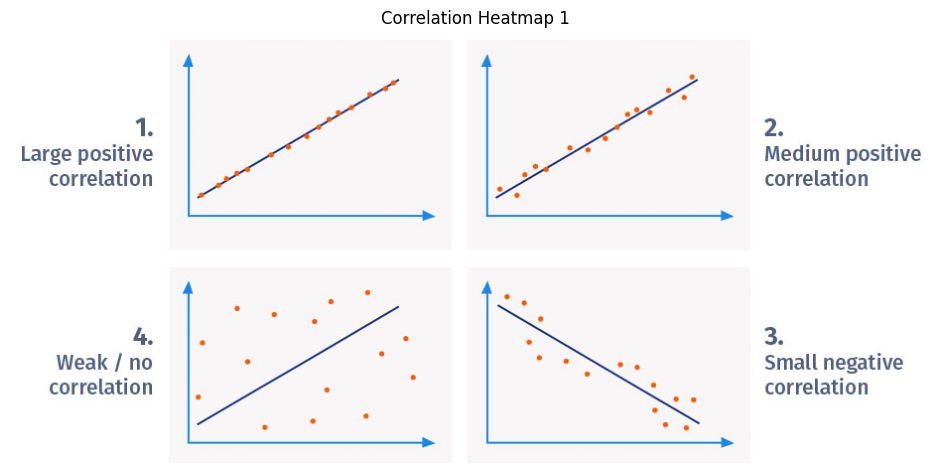

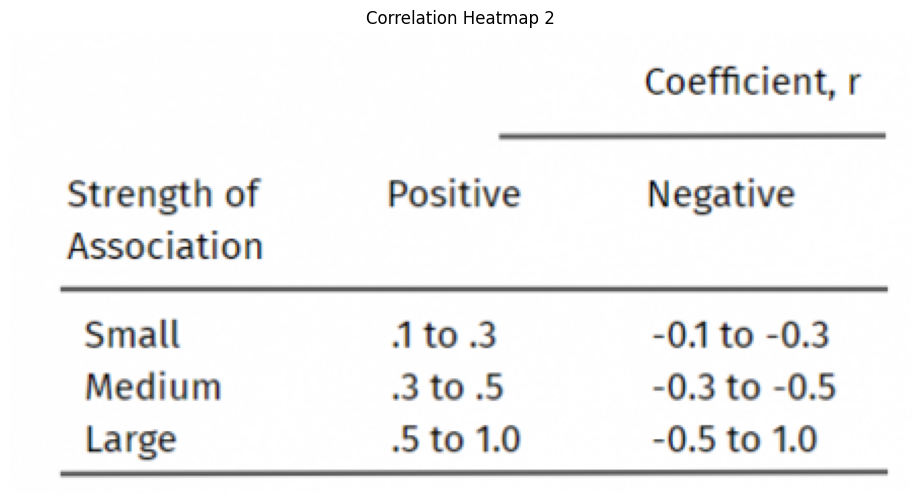

In [11]:
import matplotlib.pyplot as plt

# Hiển thị hình đầu tiên
plt.figure(figsize=(12, 6))
plt.imshow(plt.imread("corr1.png"))
plt.axis("off")
plt.title("Correlation Heatmap 1")
plt.show()

# Hiển thị hình thứ hai
plt.figure(figsize=(12, 6))
plt.imshow(plt.imread("corr2.png"))
plt.axis("off")
plt.title("Correlation Heatmap 2")
plt.show()


In [12]:
# Chỉ lấy các cột số để tính tương quan
correlations = df_dataset.drop(columns=["class"]).corr(method='pearson')

# Hiển thị kết quả
display(correlations)


,sepal-length,sepal-width,petal-length,petal-width
sepal-length,1.000000,-0.109369,0.871754,0.817954
sepal-width,-0.109369,1.000000,-0.420516,-0.356544
petal-length,0.871754,-0.420516,1.000000,0.962757
petal-width,0.817954,-0.356544,0.962757,1.000000


Nhận xét:

Các cặp tính chất có độ tương đồng cao:
(sepal-length, petal-length) = 0.872
(sepal-length, petal-width) = 0.818
(petal-length, petal-width) = 0.963

**3.2. Hiển thị dữ liệu (Visualize Data)**

**(1) Hiển thị trên từng tính chất đơn (Univariate Plots)**

In [13]:
from google.colab import files
uploaded = files.upload()


Saving boxplots.png to boxplots.png


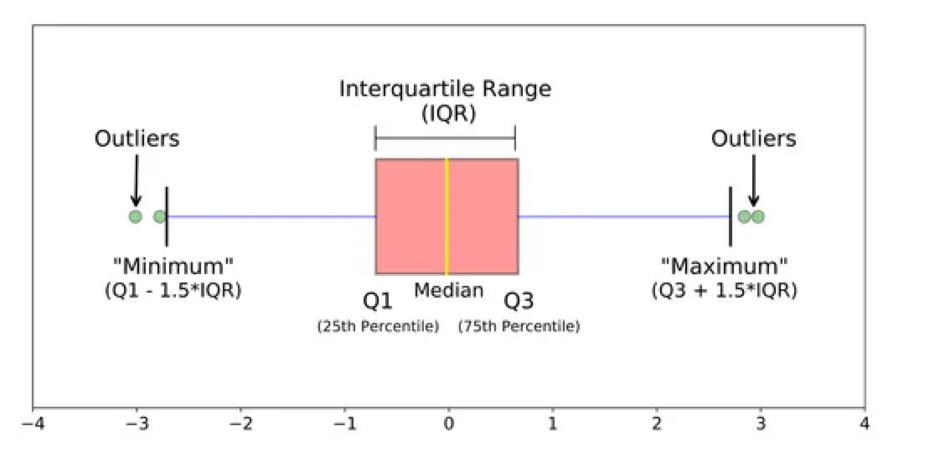

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.imshow(plt.imread("boxplots.png"))
plt.axis("off")
plt.show()


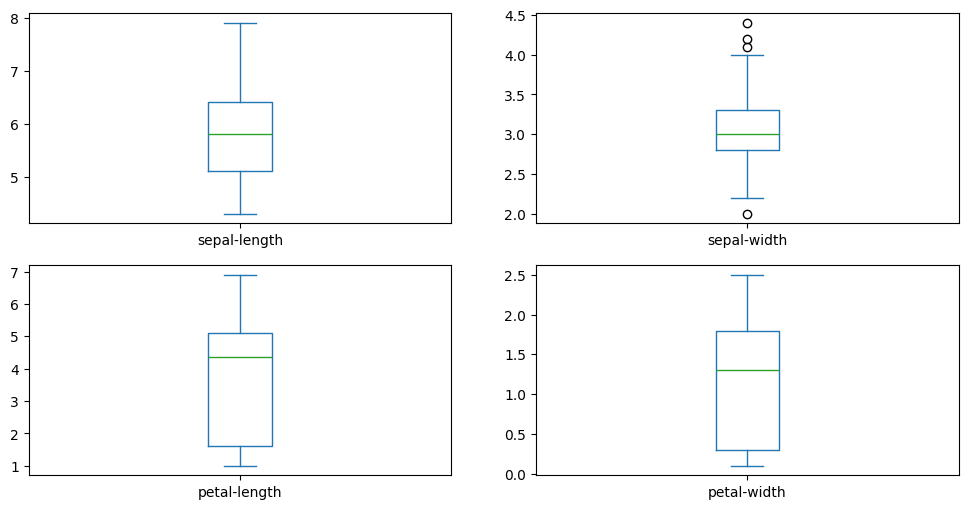

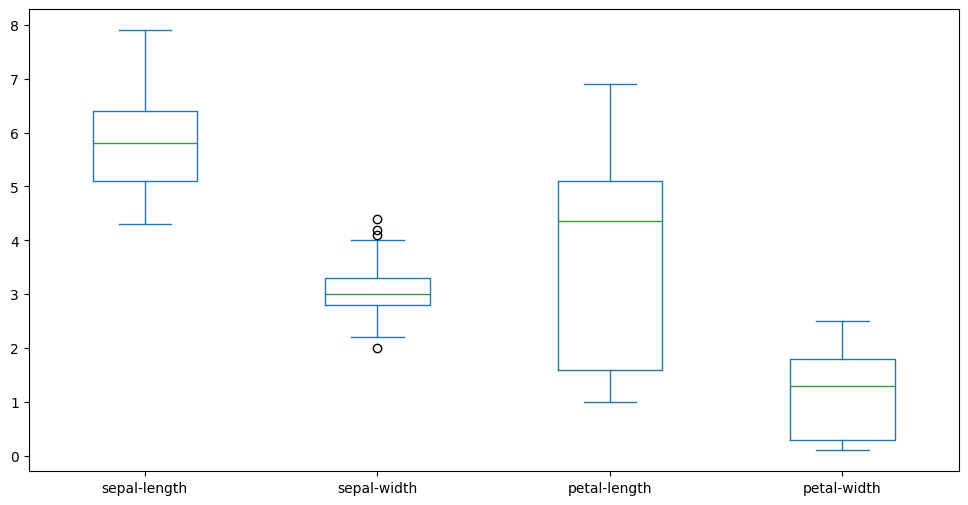

In [15]:
df_dataset.plot(kind="box", subplots=True, layout=(2, 2), sharex=False, sharey=False, figsize=(12,6));
df_dataset.plot(kind="box", figsize=(12,6));

Độ trải rộng giữa các tính chất khá khác nhau (sepal-width, sepal-length, petal-width, petal-length)
Độ lệch của sepal-length, petal-length, petal-width theo hướng giá trị nhỏ.
Phân bố giá trị của sepal-width khá cân bằng **văn bản in đậm**

**Biểu đồ Histogram**

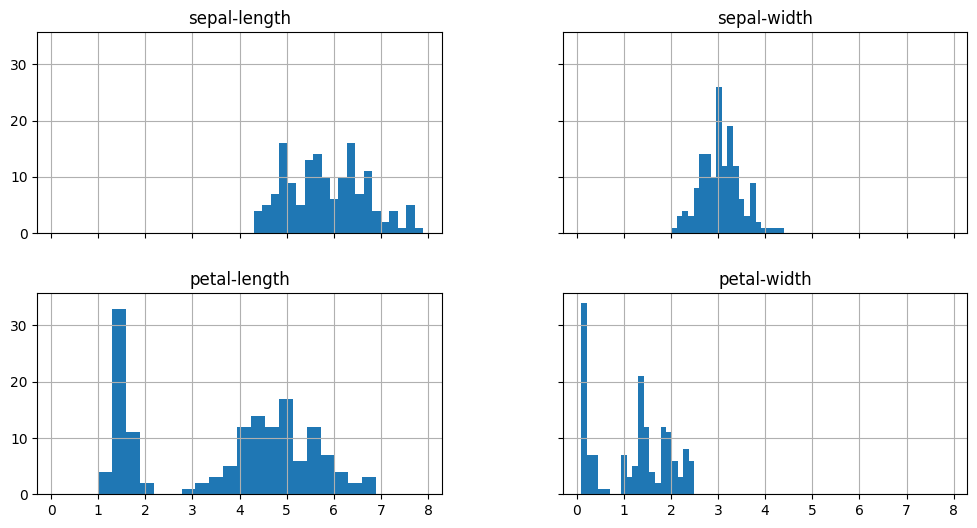

In [16]:
df_dataset.hist(figsize=(12, 6), bins = 20, sharex = True, sharey = True);

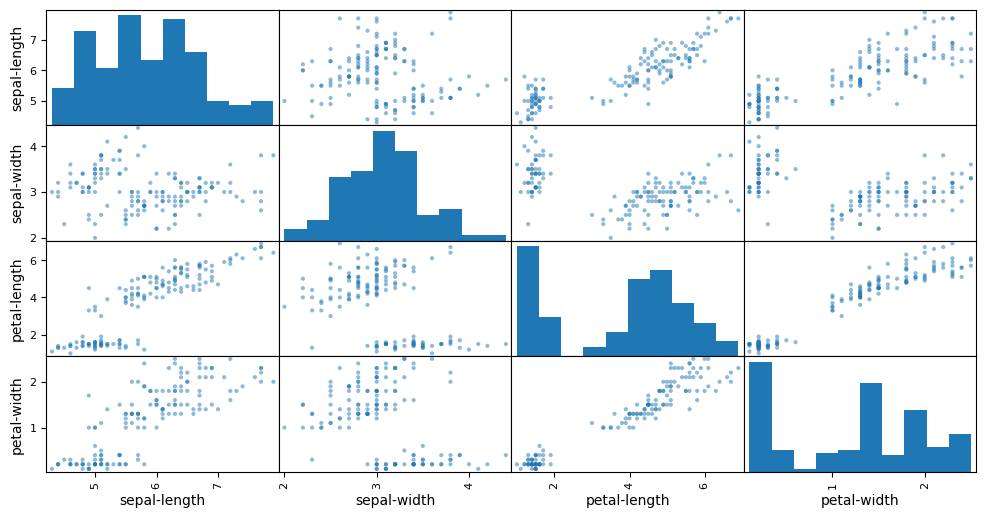

In [17]:
pd.plotting.scatter_matrix(df_dataset, figsize=(12,6));

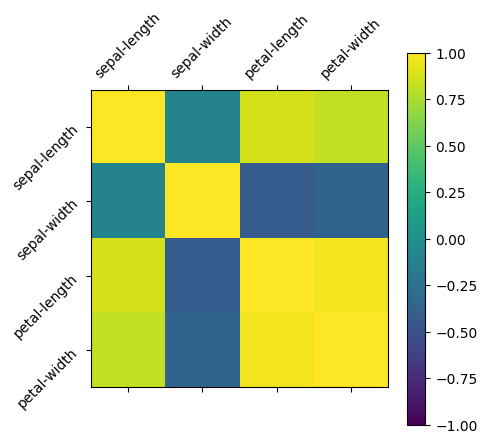

In [18]:
plt.matshow(correlations,vmin = -1, vmax = 1), plt.colorbar()
plt.xticks(np.arange(0,4), rotation = 45);
plt.yticks(np.arange(0,4), rotation = 45);
plt.gca().set_xticklabels(list(df_dataset.columns[:-1]));
plt.gca().set_yticklabels(list(df_dataset.columns[:-1]));

**4. Chuẩn bị dữ liệu (Prepare Data)**

**(1) Tạo bảng dữ liệu làm sạch**

In [19]:

df_clean = df_dataset.copy()

**(2) Xóa dữ liệu trùng nhau**

In [20]:
from IPython.display import display

# Sau đó chỉ cần gọi display() một lần, không cần display.display
display(df_dataset[df_dataset.duplicated()])


,sepal-length,sepal-width,petal-length,petal-width,class
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
142,5.8,2.7,5.1,1.9,Iris-virginica


In [21]:
from IPython.display import display

s_query1 = "`sepal-length`==4.9 and `sepal-width`==3.1 and `class`=='Iris-setosa'"
s_query2 = "`sepal-length`==5.8 and `sepal-width`==2.7 and `class`=='Iris-virginica'"

display(df_dataset.query(s_query1))
display(df_dataset.query(s_query2))


,sepal-length,sepal-width,petal-length,petal-width,class
9,4.9,3.1,1.5,0.1,Iris-setosa
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa


,sepal-length,sepal-width,petal-length,petal-width,class
101,5.8,2.7,5.1,1.9,Iris-virginica
142,5.8,2.7,5.1,1.9,Iris-virginica


In [22]:
df_clean.drop_duplicates(ignore_index=True, inplace=True)
df_clean

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
142,6.7,3.0,5.2,2.3,Iris-virginica
143,6.3,2.5,5.0,1.9,Iris-virginica
144,6.5,3.0,5.2,2.0,Iris-virginica
145,6.2,3.4,5.4,2.3,Iris-virginica


**(3) Xử lý giá trị rỗng, không hợp lệ**

In [23]:
has_null = df_dataset.isnull().sum().any()
has_nan  = df_dataset.isna().sum().any()
print(f'+ Có giá trị Null: {has_null}')
if has_null:
    display.display(df_dataset[df_dataset.isnull().any(axis=1)])
print(f'+ Có giá trị Nan: {has_nan}')
if has_nan:
    display.display(df_dataset[df_dataset.isna().any(axis=1)])

+ Có giá trị Null: False
+ Có giá trị Nan: False


Example
Nếu có dữ liệu Null, hay Nan thì chúng ta có các cách giải quyết sau:

Chúng ta xóa bỏ cột tính chất vi phạm:
df_clean.drop("cột_vi_phạm", axis=1)
Chúng ta xóa bỏ các dòng vi phạm:
df_clean.dropna(subset=["cột_vi_phạm", ...])
Điền giá trị hằng số (như số 0), hoặc nội suy bằng phần tử median:
median = df_clean["cột_vi_phạm"].median()
df_clean["cột_vi_phạm"].fillna(median, inplace=True)


In [27]:
from google.colab import files
import pandas as pd


In [28]:
uploaded = files.upload()  # Chọn file "Data.csv" từ máy


Saving iris.data.csv to iris.data.csv


In [30]:
df_dataset = pd.read_csv("iris.data.csv")

In [31]:
df_dataset.head()

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa
